# Titanic Survival Prediction Model
## Contents
1. [Introduction](#introduction)
2. [Problem Statement](#problem-statement)
3. [Data Loading and Exploration](#data-loading-and-exploration)
4. [Explolatory Data Analysis(EDA)](#explolatory-data-analysis)
5. [Feature Engineering](#feature-engineering)
6. [Data Visualization](#data-visualization)
7. [Model Training](#model-training)
8. [Model Evaluation](#model-evaluation)/
9. [Hyperparameter Tuning](#hyperparameter-tuning)
10. [Neural Network Analysis](#neural-network-analysis)
11. [Updated Model Evaluation](#updated-model-evaluation)
12. [Test Set Predictions](#test-set-predictions)
13. [Accuracy Calculation on Test Set](#accuracy-calculation-on-test-set)

## Introduction
The sinking of the RMS Titanic in 1912 was a significant maritime tragedy, leading to the loss of numerous lives. Understanding the factors that contributed to the survival of passengers can provide valuable insights into historical events and human behavior during emergencies.

This project aims to leverage machine learning techniques to analyze the Titanic dataset, predict passenger survival, and uncover patterns in the data. By employing a RandomForestClassifier and incorporating feature engineering and hyperparameter tuning, we seek to create a robust predictive model. The model's accuracy will be assessed through thorough evaluation and testing on both training and validation sets.

As we delve into this project, we will explore the nuances of the dataset, preprocess the data to handle missing values and categorical features, and engineer relevant features to enhance our model's predictive capabilities. Through each step, we will employ visualizations and statistical analyses to gain a deeper understanding of the data.

The overarching goal is not only to build an accurate predictive model but also to contribute to the broader narrative of the Titanic disaster. By combining machine learning methodologies with historical data, we aim to shed light on the factors that influenced passenger survival on that fateful voyage.
## Problem Statement

The sinking of the RMS Titanic in 1912 is a tragic event in history, and this project aims to leverage machine learning to predict passenger survival based on various features. The problem is framed as follows:

- **Objective:** Develop a predictive model to determine whether a passenger survived or not during the Titanic disaster.
- **Dataset:** Utilize the provided Titanic dataset, including features such as age, gender, ticket class, and more.
- **Approach:**
  - Perform data exploration and preprocessing to handle missing values and engineer informative features.
  - Train a machine learning model to predict passenger survival based on the selected features.
  - Evaluate the model's performance using relevant metrics and visualizations.
  - Optionally, explore hyperparameter tuning and advanced modeling techniques for optimization.
- **Outcome:** Create a reliable model capable of predicting Titanic passenger survival, contributing insights into historical events and human behavior during emergencies.

## Dataset Description

The Titanic dataset used in this project is comprised of information about passengers on board the RMS Titanic. It consists of three main datasets:

1. **Training Dataset:**
   - Contains information about a subset of passengers, including whether they survived or not.
   - Key Features:
     - **PassengerId:** Unique identifier for each passenger.
     - **Survived:** Binary indicator (0 or 1) representing whether the passenger survived (1) or not (0).
     - **Pclass:** Ticket class (1st, 2nd, or 3rd).
     - **Name:** Passenger's name.
     - **Sex:** Gender of the passenger (male or female).
     - **Age:** Age of the passenger.
     - **SibSp:** Number of siblings/spouses aboard.
     - **Parch:** Number of parents/children aboard.
     - **Ticket:** Ticket number.
     - **Fare:** Passenger fare.
     - **Cabin:** Cabin number.
     - **Embarked:** Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

2. **Test Dataset:**
   - Similar to the training dataset but without the "Survived" column.
   - Key Features aligned with the training dataset.

3. **Gender Submission Dataset:**
   - Provides a template for submitting gender-based predictions.
   - Includes "PassengerId" and "Survived" columns.
   - Assumes all females survived (1) and all males did not survive (0).

Additionally, feature engineering is applied to create the following derived features:

- **FamilySize:** Sum of SibSp and Parch, representing the total family size aboard.
- **Title:** Extracted from the 'Name' feature, representing the title of the passenger

This dataset provides a comprehensive view of passenger attributes and characteristics. The preprocessing steps enhance the dataset's quality and prepare it for training a machine learning model to predict passenger survival on the Titanic.




### Loading the required Library Packages
In this section, we will import the necessary libraries to facilitate data loading, analysis, and model development.

In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import shap
!pip install flask
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

### Data Collection
The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [2]:
# Load the datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
combined_data = pd.concat([train_data, test_data], ignore_index=True)

### Exploratory Data Analysis (EDA) 
Perform an initial exploration of the dataset to understand its structure, features, and basic statistics.

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print("Training set shape: ", train_data.shape)
print("Test set shape: ", test_data.shape)

Training set shape:  (891, 12)
Test set shape:  (418, 11)


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* **Numerical Features:** Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
* **Categorical Features:** Survived, Sex, Embarked, Pclass
* **Alphanumeric Features:** Ticket, Cabin

Now that we have an idea of what kinds of features we're working with, we can see how much information we have about each of them.

In [8]:
train_data.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Some Observations:
* There are a total of 891 passengers in our training set.
* The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps. 
* The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll probably drop these values from our dataset.
* The Embarked feature is missing 0.22% of its values, which should be relatively harmless.

In [9]:
null_percentage = (train_data== 0).mean() * 100

# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column:")
print(null_percentage)

Percentage of Null Values for Each Column:
PassengerId     0.000000
Survived       61.616162
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp          68.237935
Parch          76.094276
Ticket          0.000000
Fare            1.683502
Cabin           0.000000
Embarked        0.000000
dtype: float64


### Inferences from Null Value Percentage Analysis
The analysis of null value percentages in the dataset reveals the following insights:
1. **Age:**
    -  Approximately 0% of the data points in the "Age" column are represented as null values.
2. **Fare:**
   - The "Fare" column has a null value percentage of approximately 1.68%.
3. **SibSp:**
   - A significant portion of the "SibSp" column, around 68.23%, contains null values.
4. **Parch:**
   - The "Parch" column exhibits a higher null value percentage with approximately 76.09% of the data points being null.

These findings suggest that imputation or other strategies may be necessary for columns with substantial null values, such as "SibSp" and "Parch", to ensure the integrity of the dataset for subsequent analylsis or modeling.

In [10]:
# Identify null values
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
# Impute missing values
# For numerical features
imputer_num = SimpleImputer(strategy='mean')
train_data[['Age', 'Fare']] = imputer_num.fit_transform(train_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = imputer_num.transform(test_data[['Age', 'Fare']])

# For categorical features
imputer_cat = SimpleImputer(strategy='most_frequent')
train_data[['Embarked']] = imputer_cat.fit_transform(train_data[['Embarked']])
test_data[['Embarked']] = imputer_cat.transform(test_data[['Embarked']])


### Outlier Detection

Z-Score Outliers in Age: [71.0, 70.5, 71.0, 80.0, 70.0, 70.0, 74.0]
Isolation Forest Outliers in Age:
       Age
7     2.00
16    2.00
33   66.00
43    3.00
54   65.00
59   11.00
78    0.83
96   71.00
116  70.50
119   2.00
193   3.00
205   2.00
261   3.00
275  63.00
280  65.00
297   2.00
305   0.92
340   2.00
348   3.00
374   3.00
407   3.00
438  64.00
456  65.00
469   0.75
479   2.00
483  63.00
493  71.00
530   2.00
542  11.00
545  64.00
630  80.00
642   2.00
644   0.75
672  70.00
720   6.00
731  11.00
745  70.00
751   6.00
755   0.67
802  11.00
803   0.42
813   6.00
824   2.00
831   0.83
851  74.00
Z-Score Outliers in Fare: [263.0, 263.0, 247.5208, 512.3292, 247.5208, 262.375, 263.0, 211.5, 227.525, 263.0, 221.7792, 227.525, 512.3292, 211.3375, 227.525, 227.525, 211.3375, 512.3292, 262.375, 211.3375]
Isolation Forest Outliers in Fare:
         Fare
27   263.0000
31   146.5208
88   263.0000
118  247.5208
195  146.5208
258  512.3292
268  153.4625
269  135.6333
297  151.5500
299  247.52

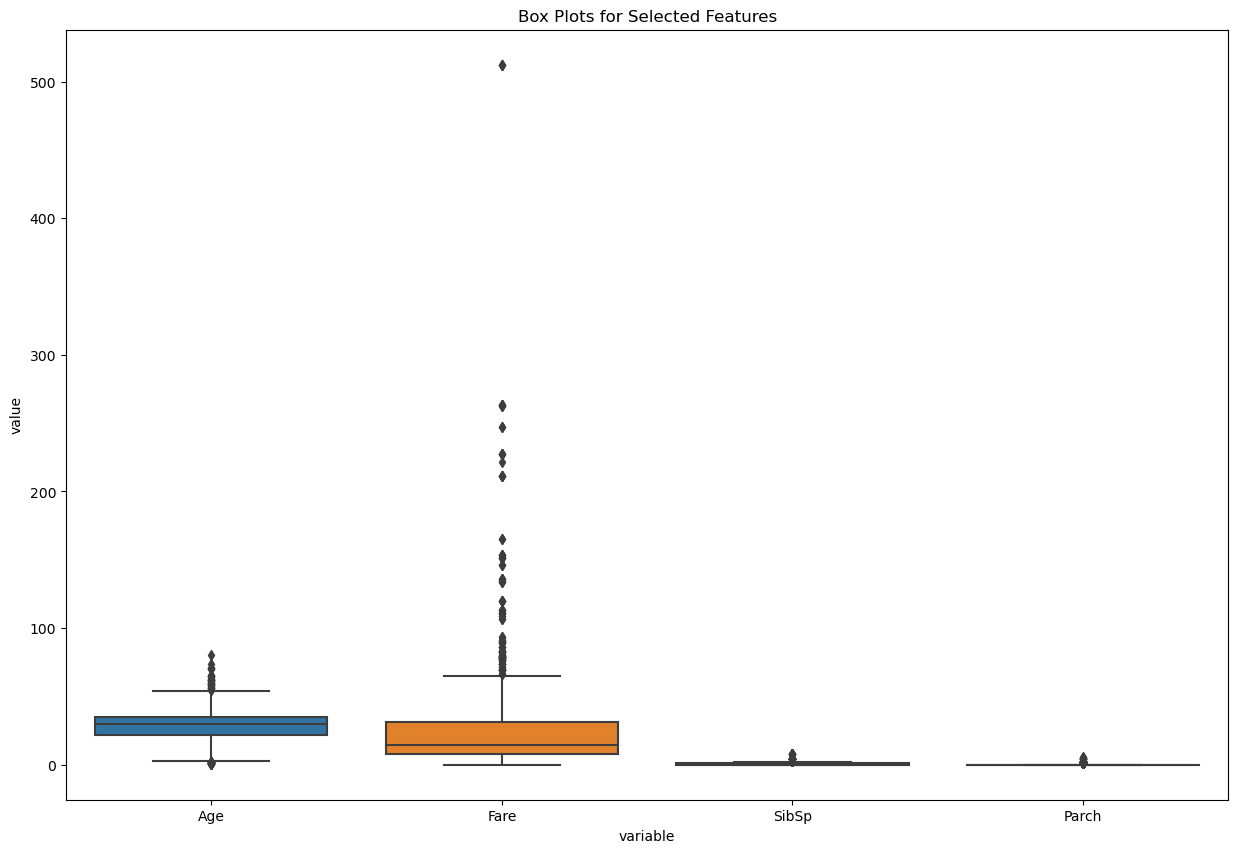

In [12]:
# Visualize Outliers with Box Plots for Multiple Features
features_to_visualize = ['Age', 'Fare', 'SibSp', 'Parch']

# Z-Score and Isolation Forest Outlier Detection for Multiple Features
for feature in features_to_visualize:
    z_scores = stats.zscore(train_data[feature])
    
    # Set a z-score threshold (e.g., 3)
    z_score_threshold = 3
    outliers = train_data[feature][abs(z_scores) > z_score_threshold]
    print(f'Z-Score Outliers in {feature}: {outliers.tolist()}')

    outlier_detector = IsolationForest(contamination=0.05)  # Adjust contamination based on your data characteristics
    train_data[f'IsOutlier_{feature}'] = outlier_detector.fit_predict(train_data[[feature]])
    outliers_iforest = train_data[train_data[f'IsOutlier_{feature}'] == -1]
    print(f'Isolation Forest Outliers in {feature}:')
    print(outliers_iforest[[feature]])


# Visualize Outliers with Box Plots for Multiple Features
plt.figure(figsize=(15, 10))
sns.boxplot(x='variable', y='value', data=pd.melt(train_data[features_to_visualize]))
plt.title('Box Plots for Selected Features')
plt.show()


#### Total Outliers: 
- For the 'Age' feature, there are 7 outliers at indices [96, 116, 493, 630, 672, 745, 851].
- For the 'Fare' feature, there are 20 outliers at various indices.
- For the 'SibSp' feature, there are 30 outliers at various indices.
- For the 'Parch' feature, there are 15 outliers at various indices.

### Feature Engineering

In [13]:
# Feature Engineering
# Extract titles from Name
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Combine rare titles into 'Rare'
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Don', 'Sir', 'Jonkheer']
train_data['Title'] = train_data['Title'].replace(rare_titles, 'Rare')
test_data['Title'] = test_data['Title'].replace(rare_titles, 'Rare')

# Create Family Size Feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1  # Adding 1 for the individual
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Display the refined data
print("Data after Feature Engineering:")
print(train_data[['Name', 'Title', 'FamilySize']].head())

Data after Feature Engineering:
                                                Name Title  FamilySize
0                            Braund, Mr. Owen Harris    Mr           2
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs           2
2                             Heikkinen, Miss. Laina  Miss           1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs           2
4                           Allen, Mr. William Henry    Mr           1


### One Hot Encoding

In [14]:
# Data Preprocessing
# One-hot encoding for categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked', 'Title'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Feature scaling
scaler = StandardScaler()
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = scaler.transform(test_data[['Age', 'Fare']])

## Data Visualization
### Bar Chart 


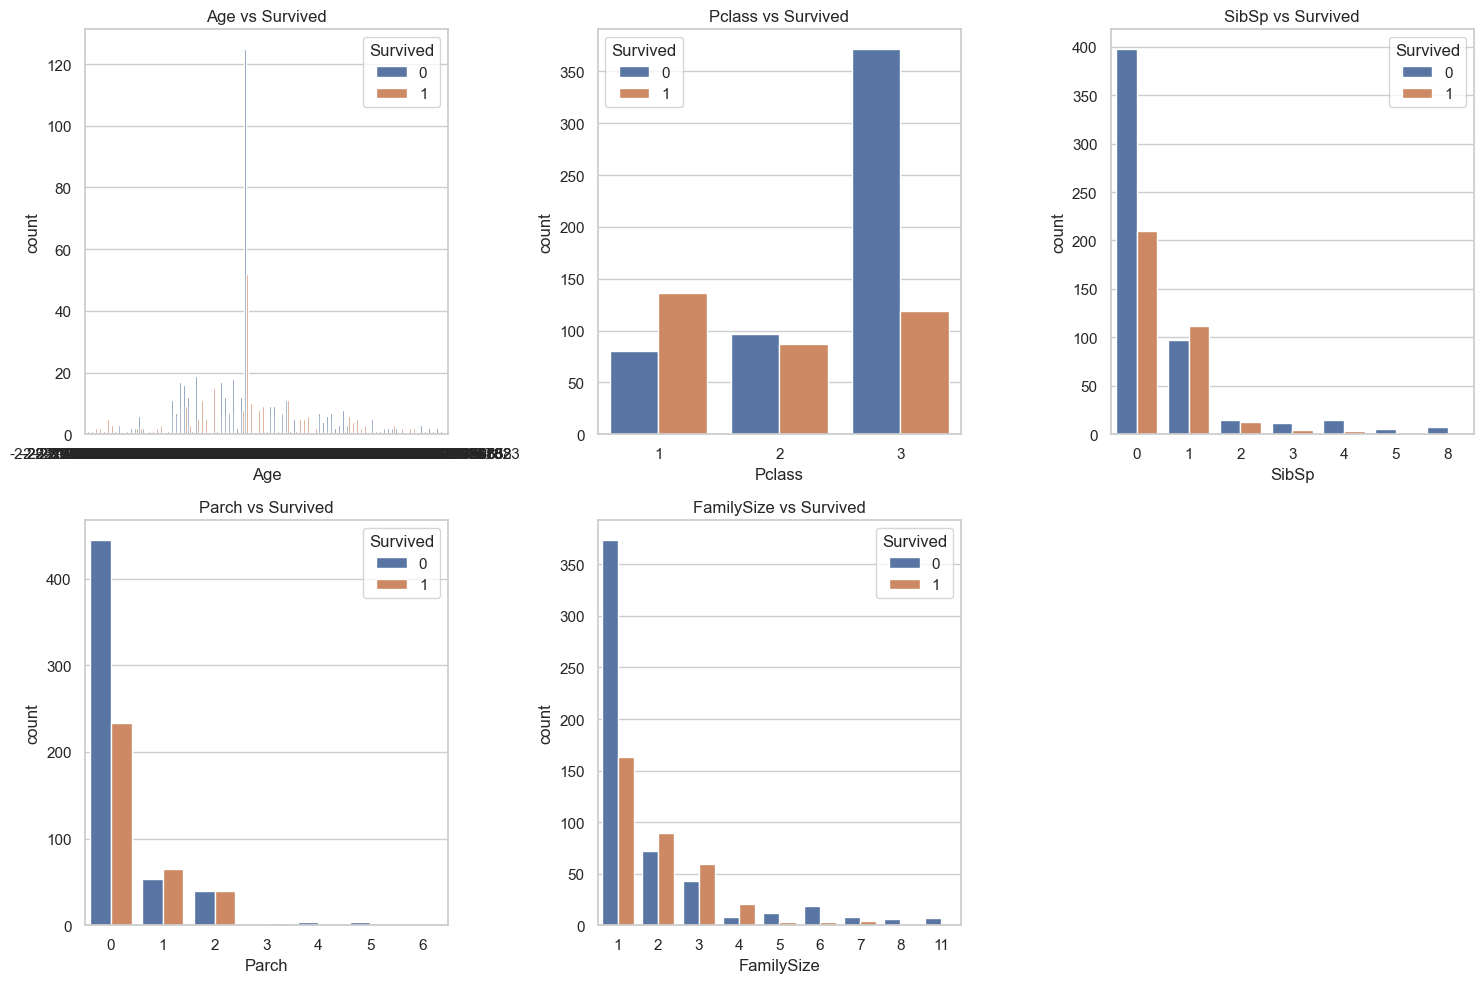

In [15]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Select categorical features to visualize
categorical_features = ['Age', 'Pclass','SibSp', 'Parch','FamilySize']

# Create a grid of subplots for each categorical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=train_data)
    plt.title(f'{feature} vs Survived')

# Adjust layout
plt.tight_layout()
plt.show()

#### Inference:
- The Chart confirms Women more likely survivied than Men.
- The Chart confirms 1st class more likely survivied than other classes.
- The Chart confirms 3rd class more likely dead than other classes
- The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived.
- The Chart confirms a person aboarded without siblings or spouse more likely dead
- The Chart confirms a person aboarded with more than 2 parents or children more likely survived.
- The Chart confirms a person aboarded alone more likely dead

- The Chart confirms a person aboarded from C slightly more likely survived.
- The Chart confirms a person aboarded from Q more likely dead.
- The Chart confirms a person aboarded from S more likely dead.

### Univariate Analysis
### Kernel Density Estimation (KDE) Plots:

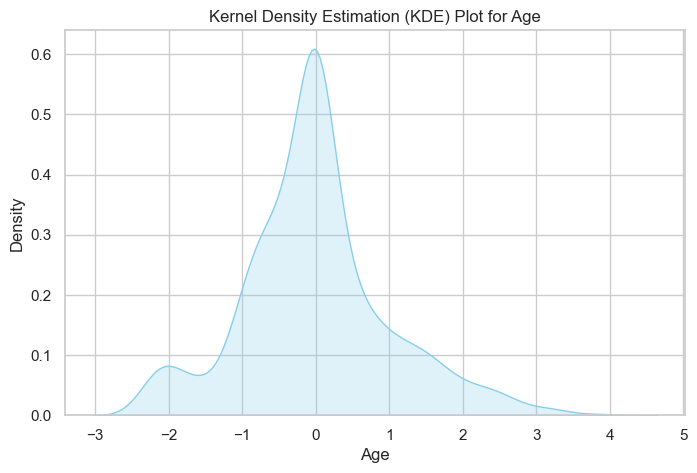

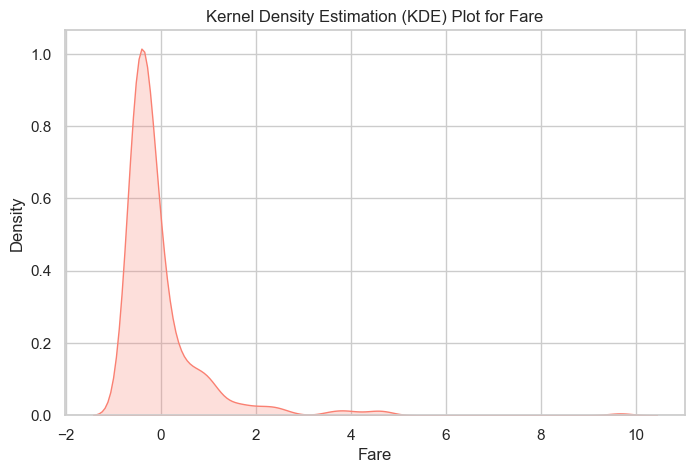

In [16]:
# KDE plot for 'Age'
plt.figure(figsize=(8, 5))
sns.kdeplot(train_data['Age'], fill=True, color='skyblue')
plt.title('Kernel Density Estimation (KDE) Plot for Age')
plt.show()

# KDE plot for 'Fare'
plt.figure(figsize=(8, 5))
sns.kdeplot(train_data['Fare'], fill=True, color='salmon')
plt.title('Kernel Density Estimation (KDE) Plot for Fare')
plt.show()


### Violin Plots:

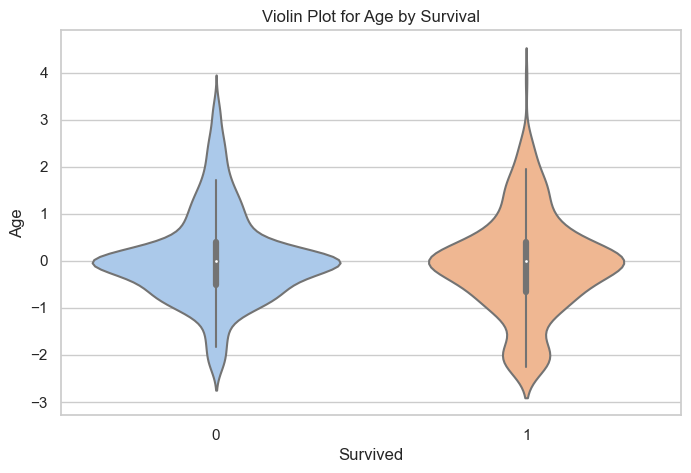

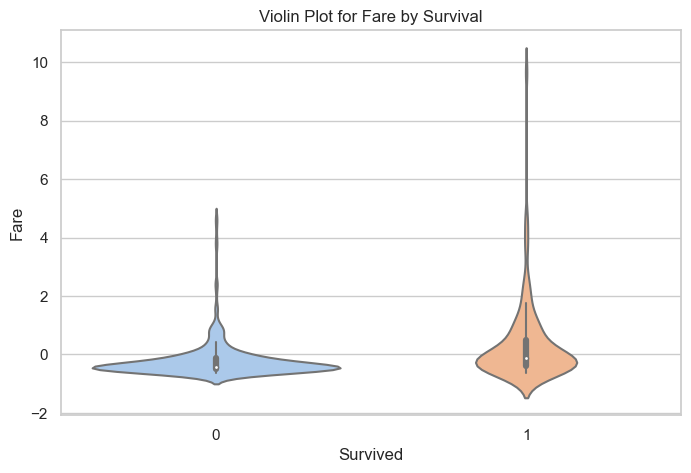

In [17]:
# Violin plot for 'Age'
plt.figure(figsize=(8, 5))
sns.violinplot(x='Survived', y='Age', data=train_data, palette='pastel')
plt.title('Violin Plot for Age by Survival')
plt.show()

# Violin plot for 'Fare'
plt.figure(figsize=(8, 5))
sns.violinplot(x='Survived', y='Fare', data=train_data, palette='pastel')
plt.title('Violin Plot for Fare by Survival')
plt.show()

### Bivariate Analysis

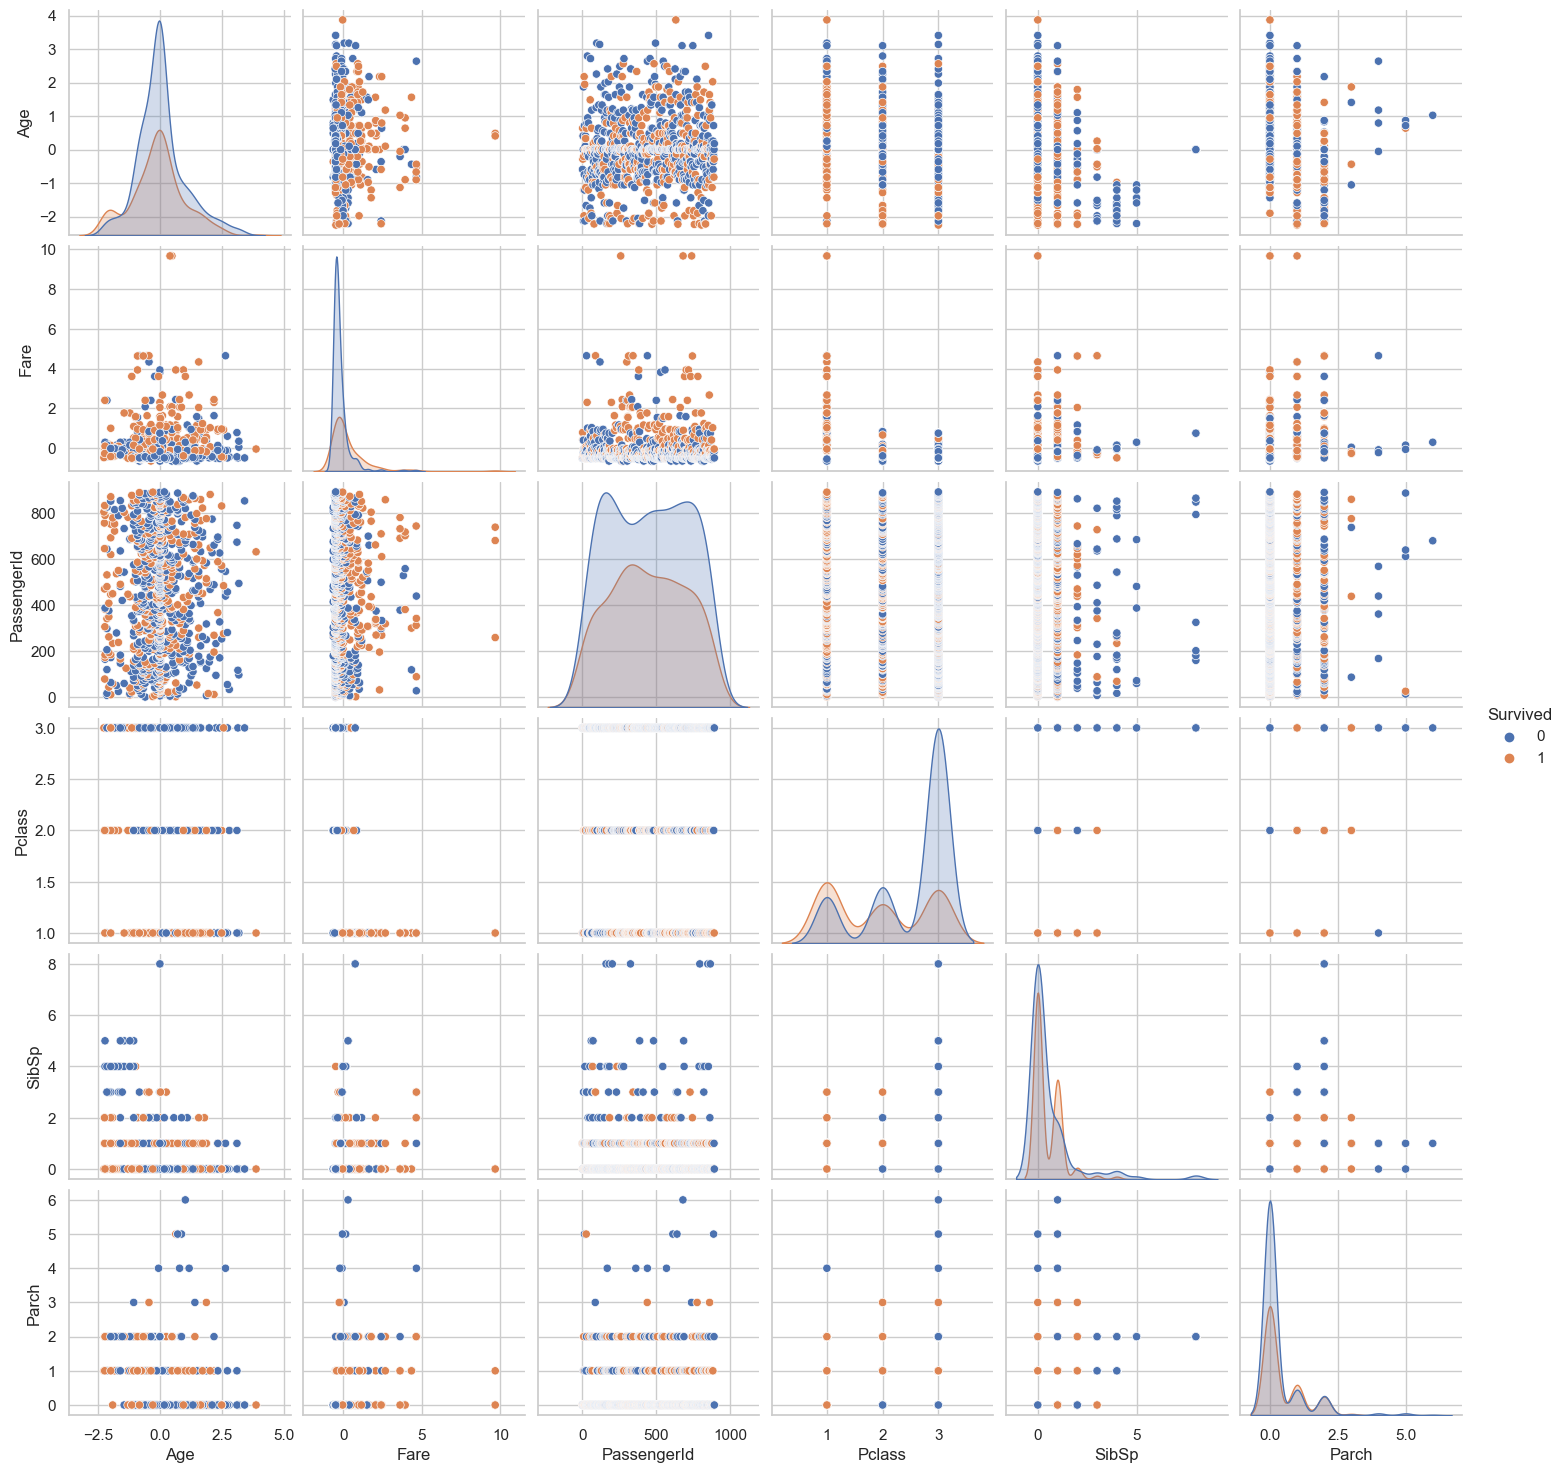

In [18]:
# Pair plot for selected columns
selected_columns = ['Age', 'Fare', 'PassengerId', 'Pclass', 'SibSp', 'Parch','Survived']
sns.pairplot(train_data[selected_columns], hue='Survived')
plt.show()

### Multivariate Analysis
### Heatmap

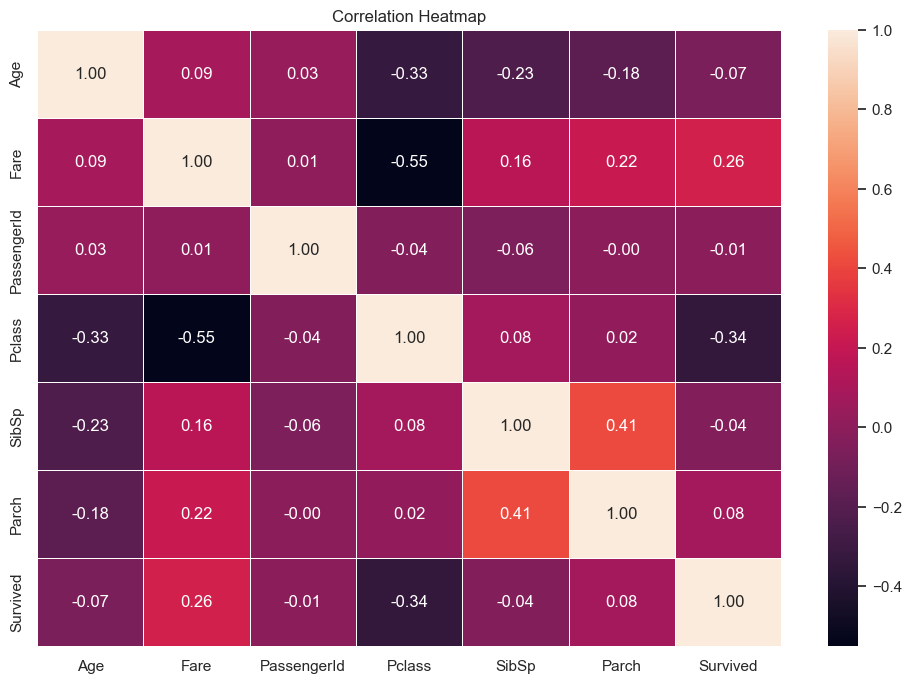

In [19]:
# Correlation heatmap for selected columns
correlation_matrix = train_data[selected_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### Model Training

In [20]:
X = train_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Convert X_train and X_test to NumPy arrays
X_train_np = X_train.values.astype(np.float32, order='C')
X_test_np = X_test.values.astype(np.float32, order='C')

# Train models
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
}

stacking_model = StackingClassifier(estimators=list(models.items()), final_estimator=RandomForestClassifier())

models['Stacking Classifier'] = stacking_model

accuracy_results = {}

for name, model in models.items():
    model.fit(X_train_np, y_train)
    y_pred = model.predict(X_test_np)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

# Display accuracy results in tabular form
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])
print(accuracy_df)

                 Model  Accuracy
0                  KNN  0.810056
1  Logistic Regression  0.810056
2        Decision Tree  0.810056
3        Random Forest  0.832402
4                  SVM  0.826816
5             AdaBoost  0.810056
6    Gradient Boosting  0.832402
7              XGBoost  0.821229
8          Extra Trees  0.793296
9  Stacking Classifier  0.815642


### Accuracy

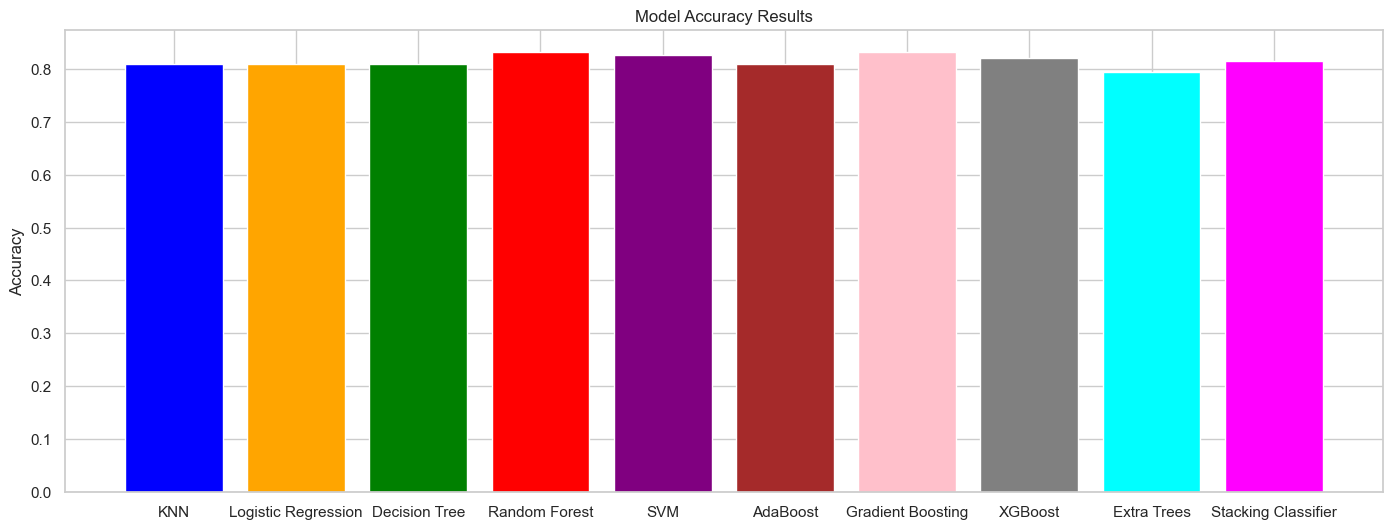

In [22]:
# Plot accuracy results
plt.figure(figsize=(17, 6))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

plt.bar(accuracy_results.keys(), accuracy_results.values(), color=colors)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Results')
plt.show()


### Model Evaluation

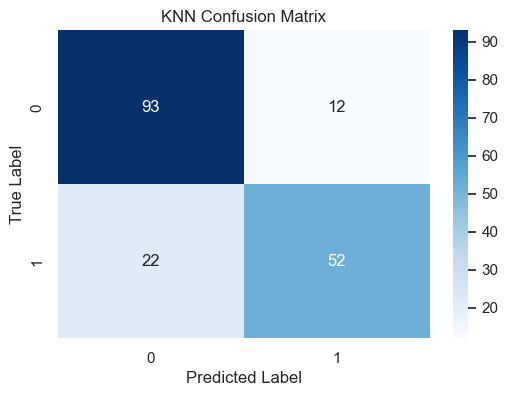


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



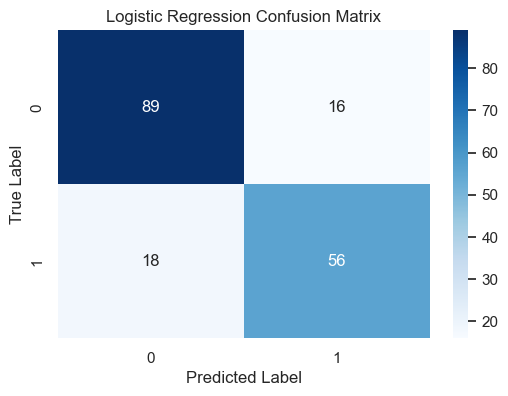


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



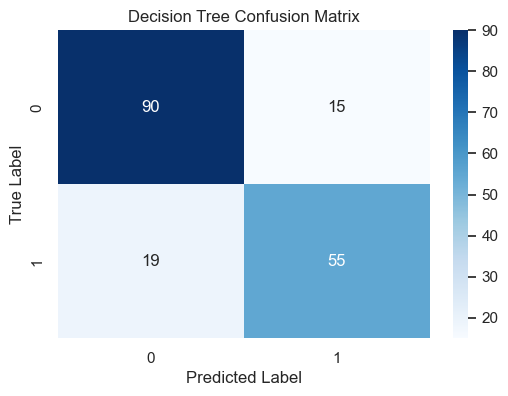


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



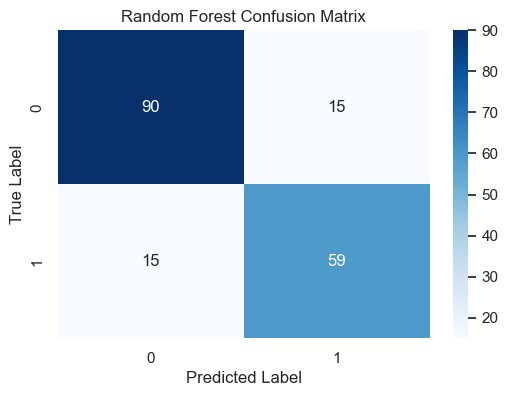


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       105
           1       0.80      0.80      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



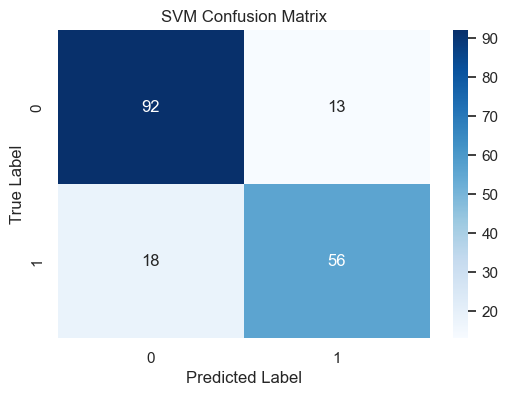


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



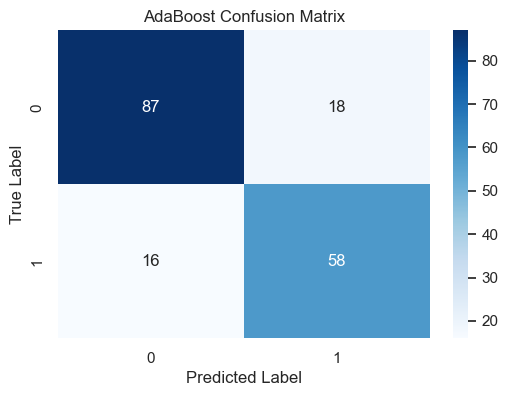


AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       105
           1       0.76      0.78      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179



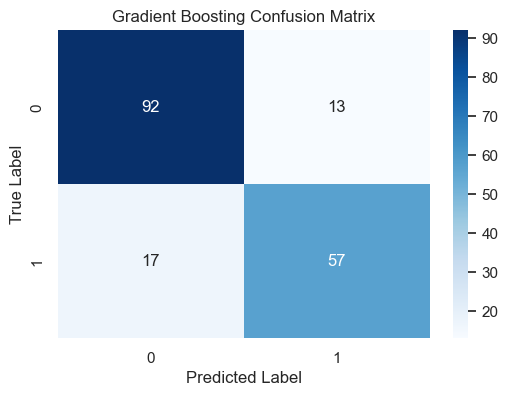


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



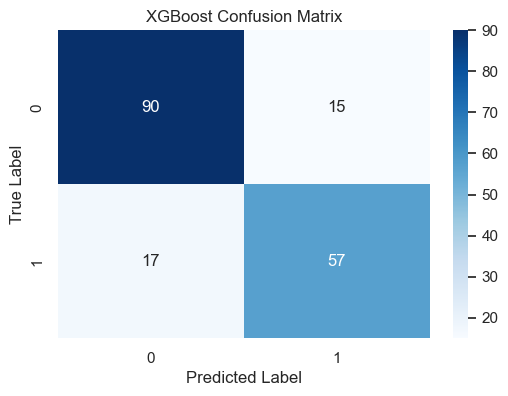


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



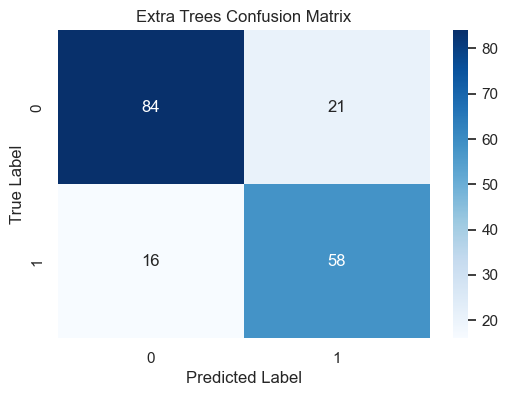


Extra Trees Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       105
           1       0.73      0.78      0.76        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.79      0.79       179



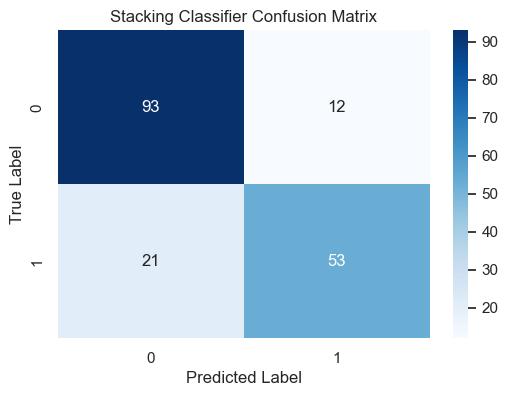


Stacking Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [23]:
def plot_confusion_matrix(model, X_test, y_test):
    predictions = model.predict(X_test)
    confusion_mat = confusion_matrix(y_test, predictions)

    # Plot confusion matrix using seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

def generate_classification_report(model, X_test, y_test):
    predictions = model.predict(X_test)
    classification_rep = classification_report(y_test, predictions)
    print(f'\n{name} Classification Report:\n{classification_rep}')

# Model Evaluation with Confusion Matrix and Classification Report Plots
for name, model in models.items():
    plot_confusion_matrix(model, X_test_np, y_test)
    generate_classification_report(model, X_test_np, y_test)


### Precission Recall Curve

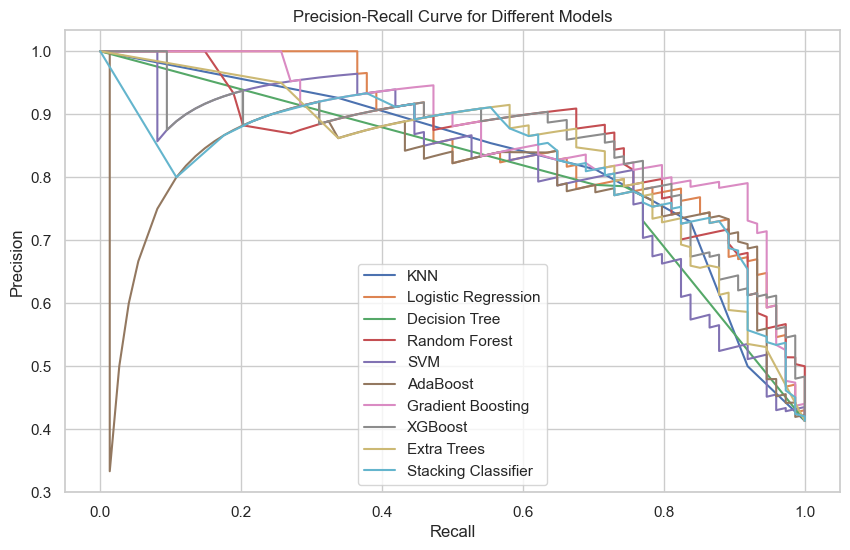

In [24]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Plot Precision-Recall Curve for each model
plt.figure(figsize=(10, 6))

for name, model in models.items():
    if name == 'Stacking Classifier':
        y_scores = model.predict_proba(X_test_np)[:, 1]
    else:
        y_scores = model.decision_function(X_test_np) if hasattr(model, 'decision_function') else model.predict_proba(X_test_np)[:, 1]

    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    plt.plot(recall, precision, label=f'{name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Different Models')
plt.legend()
plt.show()

### ROC and AOC Curve

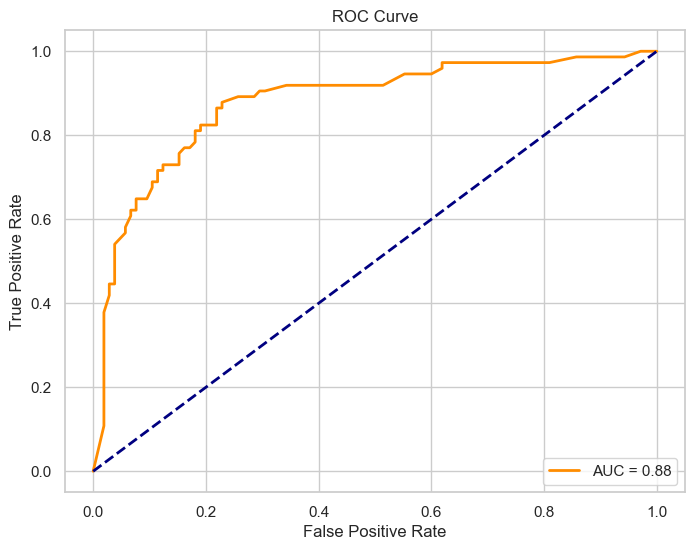

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Feature Importance

KNN does not have feature importances.


Logistic Regression does not have feature importances.




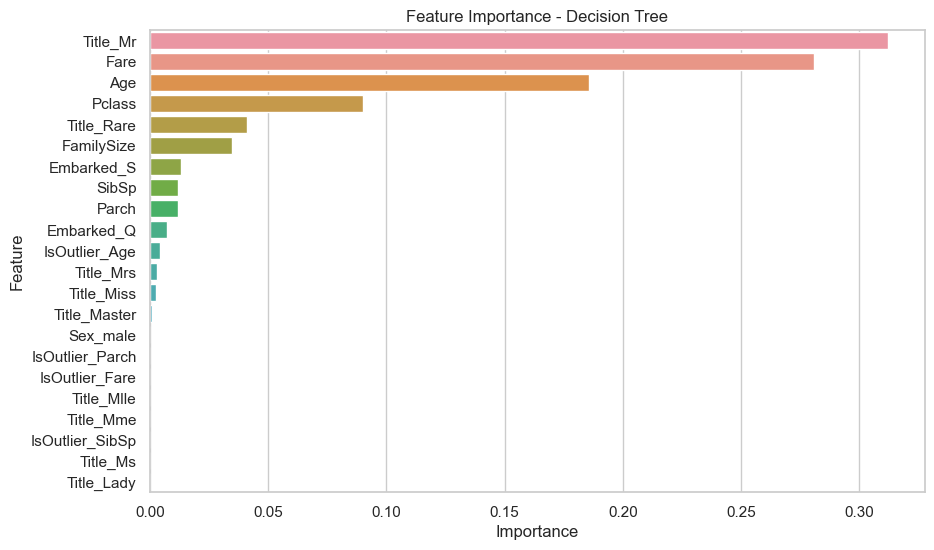

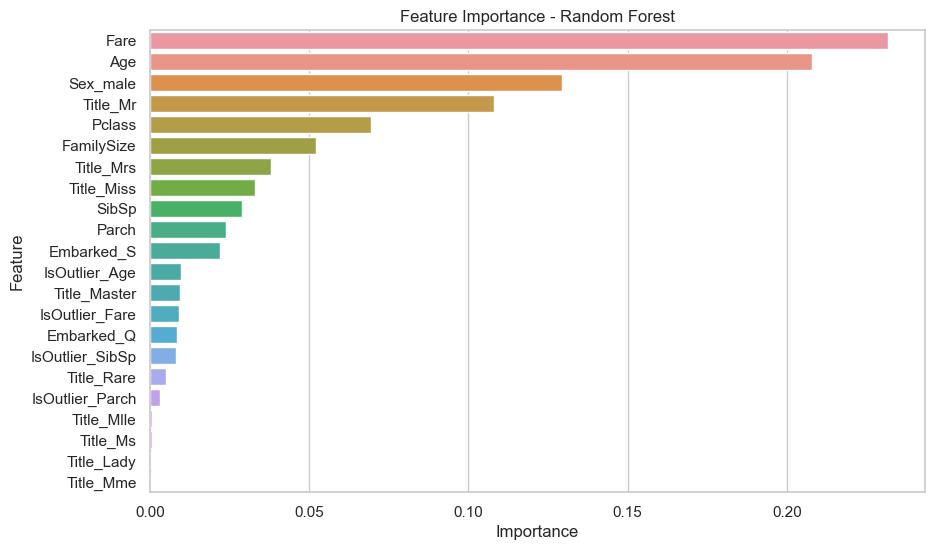



SVM does not have feature importances.




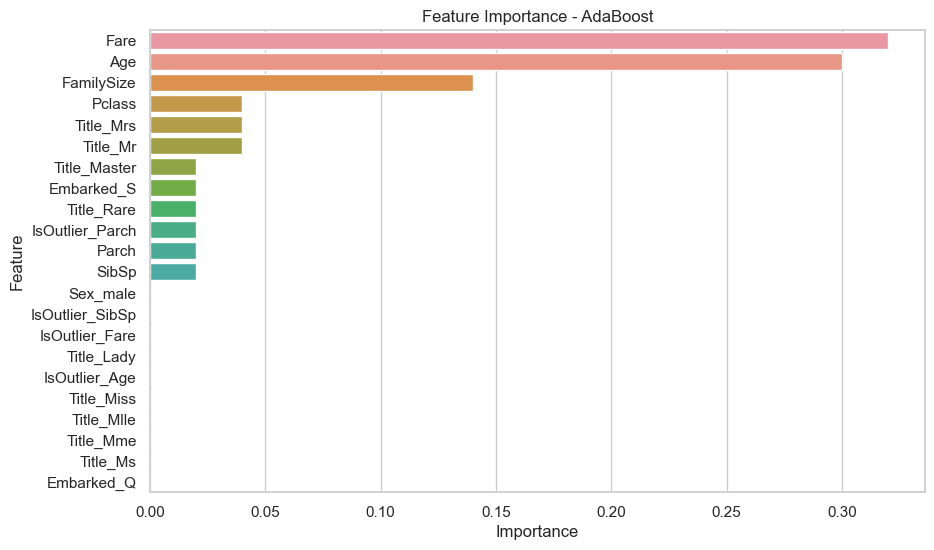

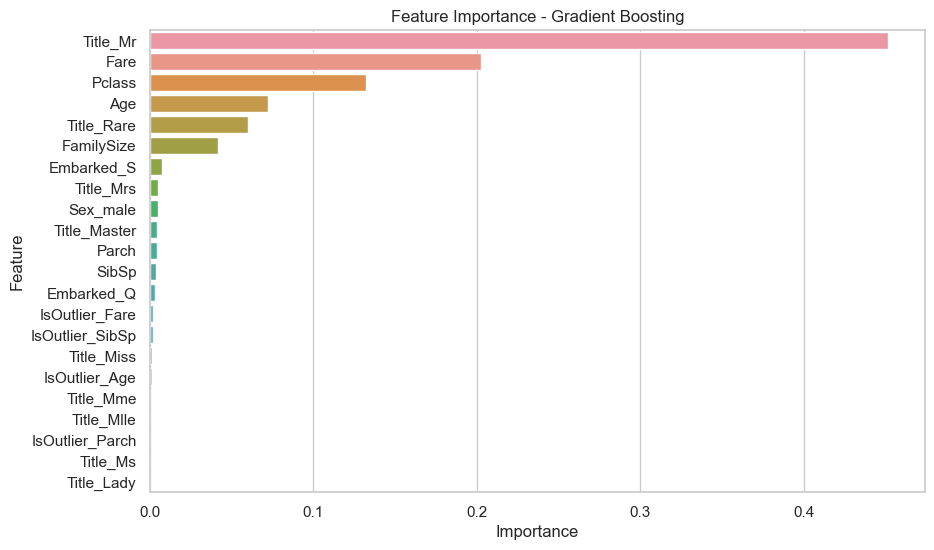

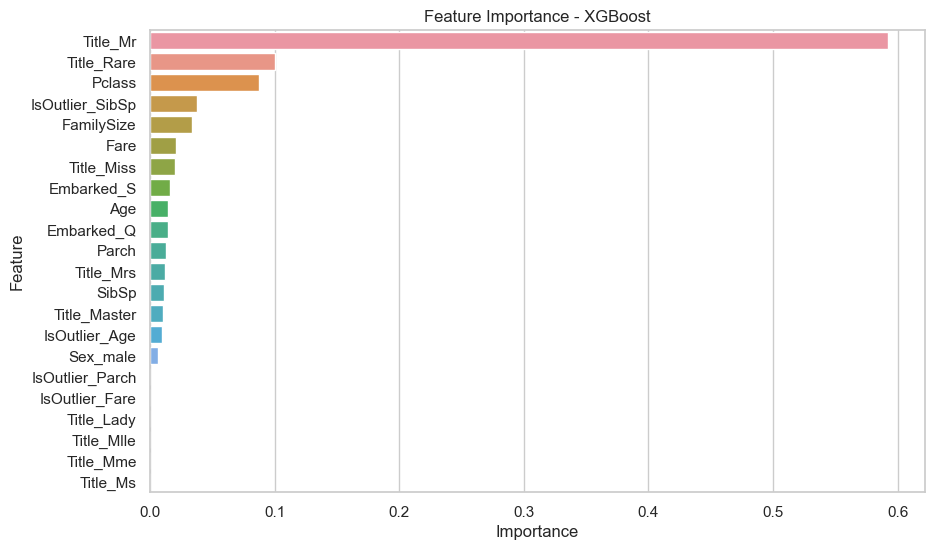

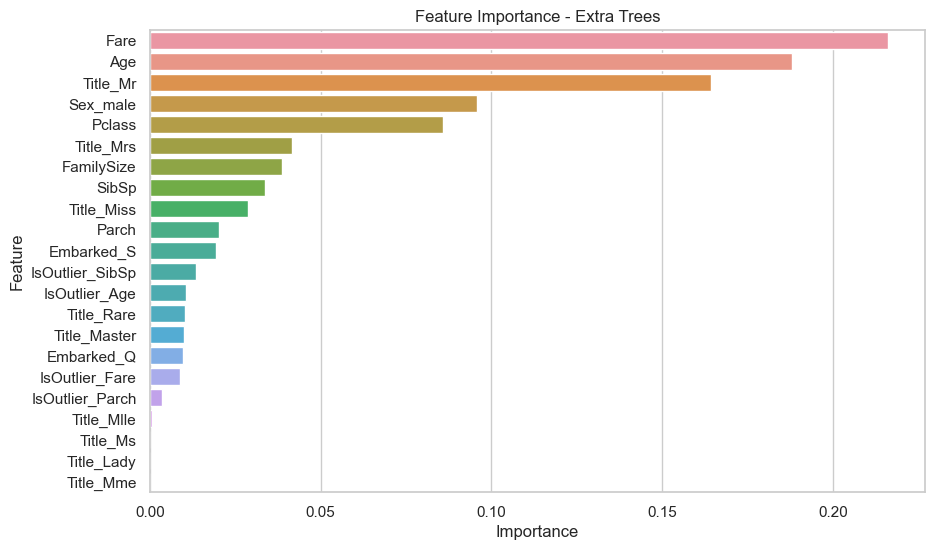



Stacking Classifier does not have feature importances.




In [26]:
# Train different models including boosting classifiers
for name, model in models.items():
    model.fit(X_train_np, y_train)
    predictions = model.predict(X_test_np)

    # Check if the model has feature_importances_ attribute (for tree-based models)
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        feature_names = X.columns

        # Display feature importance
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title(f'Feature Importance - {name}')
        plt.show()
    else:
        print(f'{name} does not have feature importances.')

    print('\n')


### Cross Validation

In [27]:
# Define and train the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')

Cross-Validation Scores: [0.79888268 0.79775281 0.85393258 0.75280899 0.82022472]


### Hyperparameter Tuning

In [28]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X, y) 
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


### Ensemble Methods

In [29]:
ensemble_model = RandomForestClassifier(**best_params)
ensemble_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5)

### Model Interpretability

### SHAP (SHapley Additive exPlanations) values

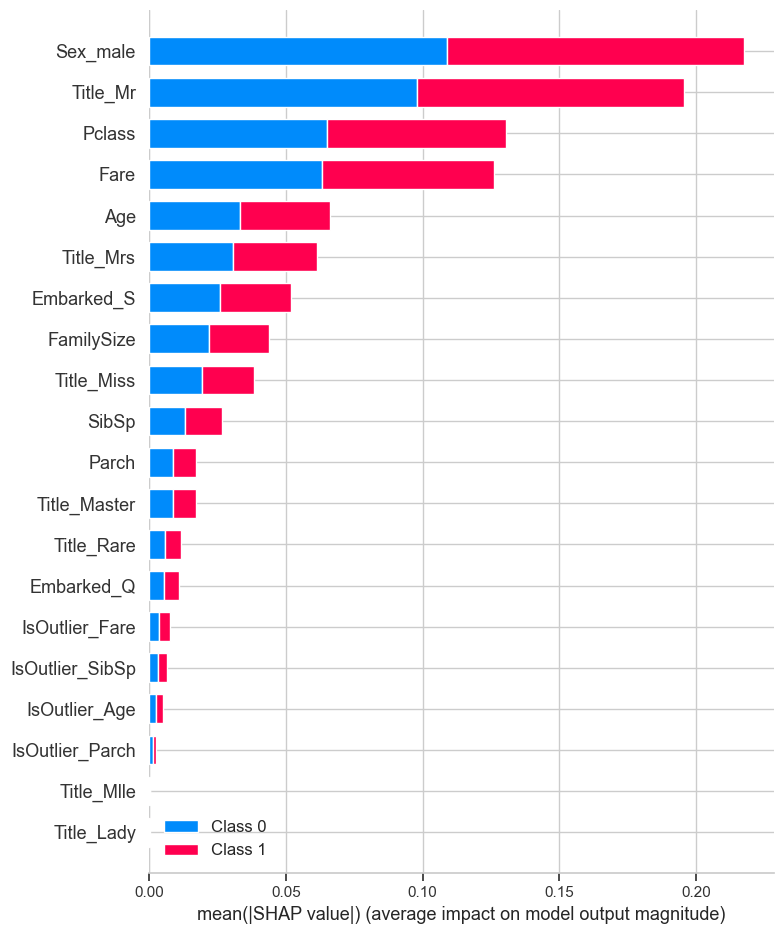

In [30]:
# SHAP values
explainer = shap.Explainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

### LIME (Local Interpretable Model-agnostic Explanations)

In [31]:
# LIME
# Install lime library: pip install lime
from lime import lime_tabular

explainer_lime = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
lime_explanation = explainer_lime.explain_instance(X_test.iloc[0].values, rf_model.predict_proba)

# Print explanation
lime_explanation.show_in_notebook(show_table=True, show_all=False)

## Neural Network Analysis

### Model Defining

In [32]:
# Define the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define callbacks for early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

### Model Training

In [33]:
# Train the model with callbacks
history = model.fit(X_train_np, y_train, epochs=20, batch_size=32, 
                    validation_data=(X_test_np, y_test), 
                    callbacks=[early_stopping, model_checkpoint])

# Evaluate the model on the test set
y_pred_nn_probs = model.predict(X_test_np)
y_pred_nn = (y_pred_nn_probs > 0.5).astype(int)

# Calculate accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f'\nNeural Network Accuracy: {accuracy_nn}')

Epoch 1/20


23/23 [==============================] - 2s 19ms/step - loss: 0.6529 - accuracy: 0.5885 - val_loss: 0.5821 - val_accuracy: 0.6313
Epoch 2/20
23/23 [==============================] - 0s 9ms/step - loss: 0.5613 - accuracy: 0.7346 - val_loss: 0.5066 - val_accuracy: 0.7598
Epoch 3/20
23/23 [==============================] - 0s 8ms/step - loss: 0.5180 - accuracy: 0.7514 - val_loss: 0.4626 - val_accuracy: 0.8045
Epoch 4/20
23/23 [==============================] - 0s 8ms/step - loss: 0.4767 - accuracy: 0.7907 - val_loss: 0.4389 - val_accuracy: 0.8101
Epoch 5/20
23/23 [==============================] - 0s 6ms/step - loss: 0.4664 - accuracy: 0.8006 - val_loss: 0.4442 - val_accuracy: 0.8101
Epoch 6/20
23/23 [==============================] - 0s 8ms/step - loss: 0.4475 - accuracy: 0.8188 - val_loss: 0.4275 - val_accuracy: 0.8101
Epoch 7/20
23/23 [==============================] - 0s 7ms/step - loss: 0.4624 - accuracy: 0.8188 - val_loss: 0.4240 - val_accuracy: 0.8101
Epoch 8/20
23/23 

In [34]:
# Display model summary
print("Neural Network Model Summary:")
model.summary()

Neural Network Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2944      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11265 (44.00 KB)
Trainable params: 11265 (44.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Confusion Matrix

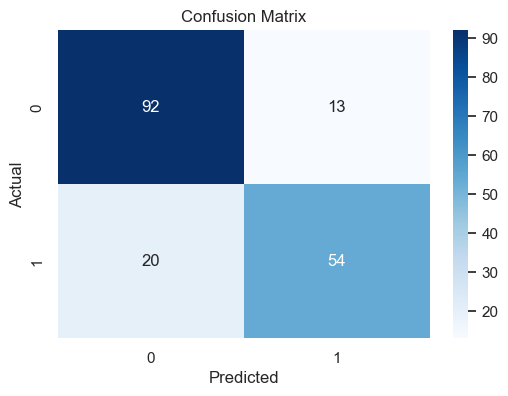

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [35]:
# Additional analysis - Confusion Matrix and Classification Report
conf_mat = confusion_matrix(y_test, y_pred_nn)
class_rep = classification_report(y_test, y_pred_nn)
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f'Classification Report:\n{class_rep}')

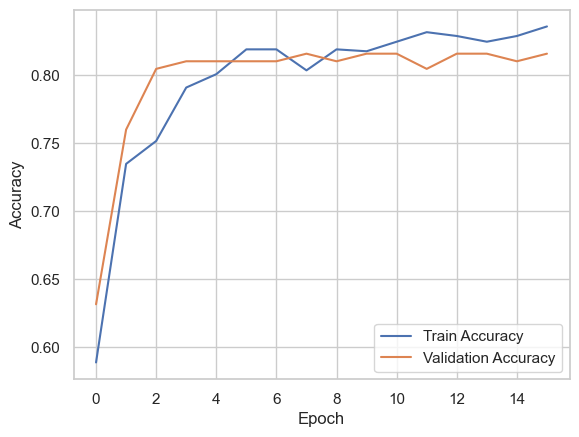

In [36]:
# Plot training history (requires matplotlib)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
import joblib
joblib.dump(ensemble_model, 'titanic_survival_prediction_model.joblib')

['titanic_survival_prediction_model.joblib']

In [38]:
def predict(input_data):
    # Load the saved model
    model = joblib.load('final_model.joblib')

    # Perform predictions
    predictions = model.predict(input_data)
    
    return predictions

In [39]:
import logging

logging.basicConfig(filename='model_log.log', level=logging.INFO)

def predict(input_data):
    try:
        # Load the saved model
        model = joblib.load('final_model.joblib')

        # Perform predictions
        predictions = model.predict(input_data)
        
        # Log the predictions
        logging.info(f"Predictions: {predictions}")

        return predictions
    except Exception as e:
        logging.error(f"Error during prediction: {str(e)}")
        raise
